# PiML Toolbox: High-code Demo for BikeSharing Data

This example notebook demonstrates how to use PiML with its high-code APIs for developing machine learning models for the BikeSharing data from UCI repository, which consists of 17,389 samples of hourly counts of rental bikes in Capital bikeshare system; see details [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). 

The response `cnt` (hourly bike rental counts) is continuous and it is a regression problem.

# Install PiML Toolbox

1. Run `!pip install piml` to install the latest version of PiML
2. In Google Colab, we need restart the runtime in order to use newly installed version

In [ ]:
!pip install piml

In [1]:
!pip show PiML

Name: PiML
Version: 0.4.0.post1
Summary: A low-code interpretable machine learning toolbox in Python.
Home-page: https://github.com/SelfExplainML/PiML-Toolbox
Author: Sudjianto, Agus and Zhang, Aijun and Yang, Zebin and Su, Yu and Zeng, Ningzhou and Nair, Vijay
Author-email: None
License: Apache
Location: /usr/local/lib/python3.7/dist-packages
Requires: shap, seaborn, statsmodels, pygam, pandas, scipy, lightgbm, packaging, scikit-learn, ipywidgets, xlrd, lime, joblib, numpy, matplotlib, torch, ipython, xgboost
Required-by: 


# Load and Prepare Data

In [2]:
from piml import Experiment
exp = Experiment()

In [3]:
# Choose BikeSharing
exp.data_loader(data='BikeSharing')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [4]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary(feature_exclude=["season", "workingday", "atemp"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(17379, 13)')

In [5]:
# Prepare dataset by setting target, task type and train-test split
exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,"[season, workingday, atemp]"
1,Target variable,cnt
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.2
6,Random state,0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

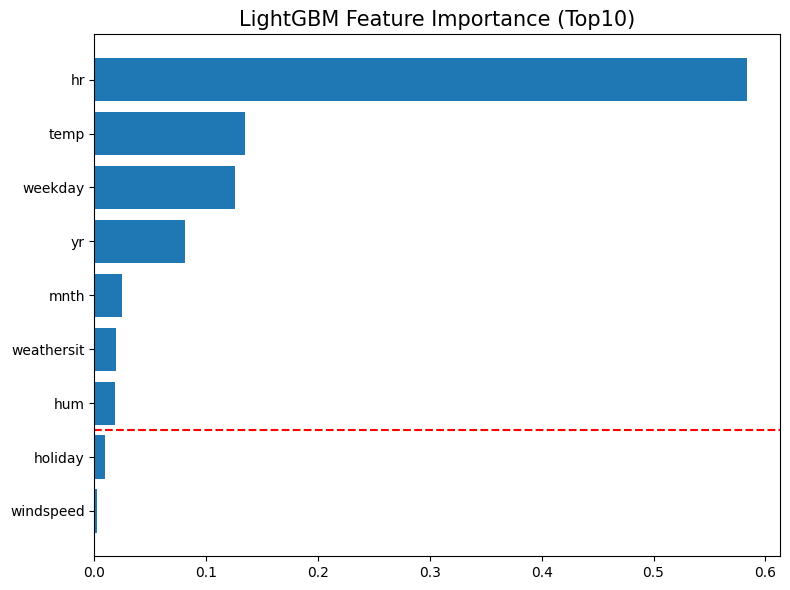

In [9]:
# Optional: select features by LightGBM feature importance 
exp.feature_select(threshold=0.98)

In [10]:
# Exploratory data analysis, check distribution and correlation
exp.eda(show='all', uni_feature='temp', bi_features=['hr', 'cnt'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Train intepretable models

In [11]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization
from piml.models import ReluDNNRegressor

clf1 = ReluDNNRegressor(hidden_layer_sizes=(40, 40), l1_reg=1e-05,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,MSE,MAE,R2
,,,
Train,0.0030,0.0364,0.9131
Test,0.0034,0.0385,0.9044
Gap,0.0004,0.0021,-0.0087


In [12]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetRegressor

clf2 = GAMINetRegressor(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,MSE,MAE,R2
,,,
Train,0.0034,0.0392,0.9012
Test,0.0037,0.0417,0.8940
Gap,0.0003,0.0025,-0.0072


In [13]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingRegressor

clf3 = ExplainableBoostingRegressor(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register EBM Done</p>")

,MSE,MAE,R2
,,,
Train,0.0064,0.0554,0.8151
Test,0.0069,0.0573,0.8041
Gap,0.0005,0.0019,-0.0110


In [14]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Explainability and Interpretability

## Post-hoc Explainability: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

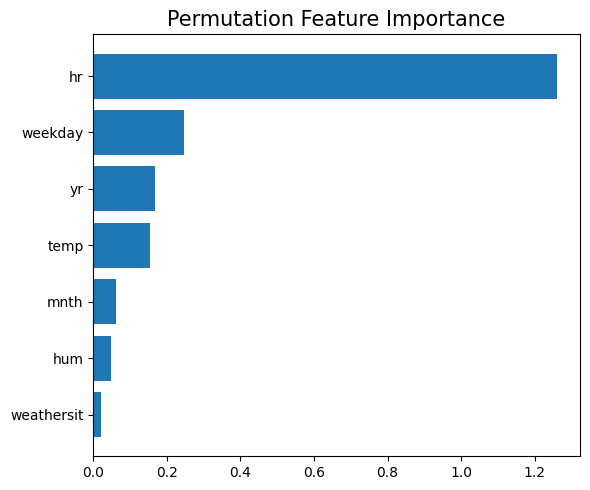

In [15]:
exp.model_explain(model='GAMI-Net', show='global_pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

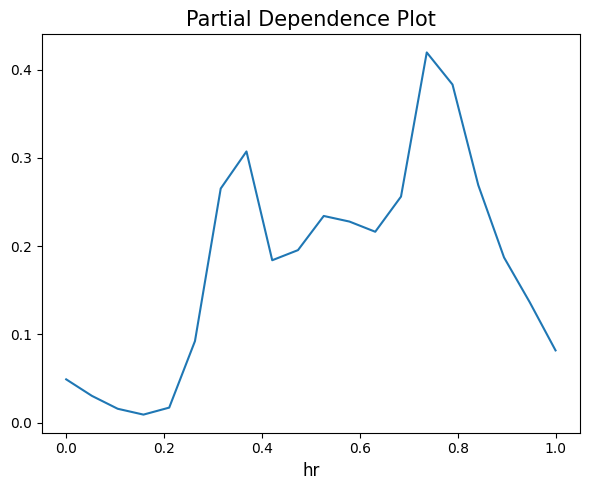

In [16]:
exp.model_explain(model='GAMI-Net', show='global_pdp', uni_feature='hr', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

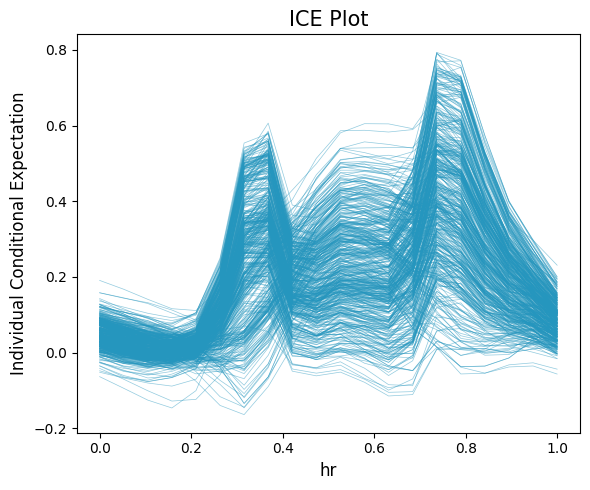

In [17]:
exp.model_explain(model='GAMI-Net', show='global_ice', uni_feature="hr", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

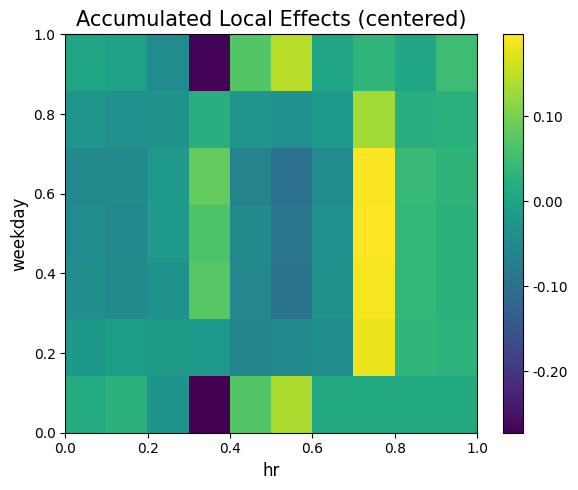

In [18]:
exp.model_explain(model='GAMI-Net', show='global_ale', bi_features=['hr', 'weekday'], figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

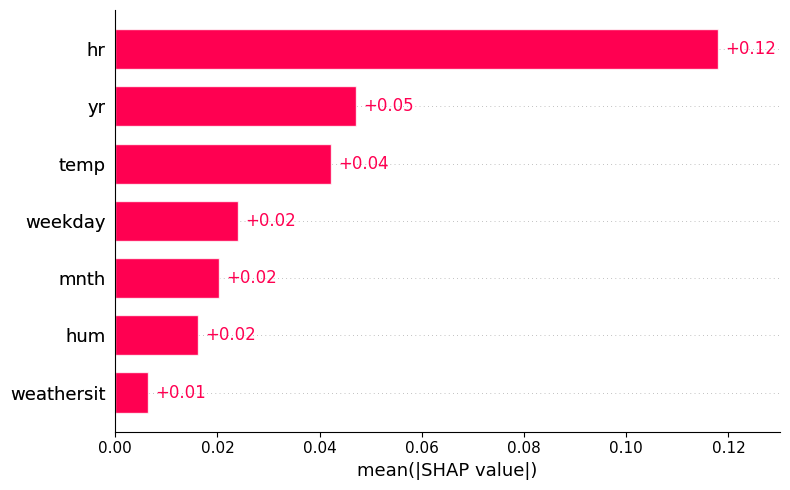

In [19]:
exp.model_explain(model='GAMI-Net', show='global_shap_fi', sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

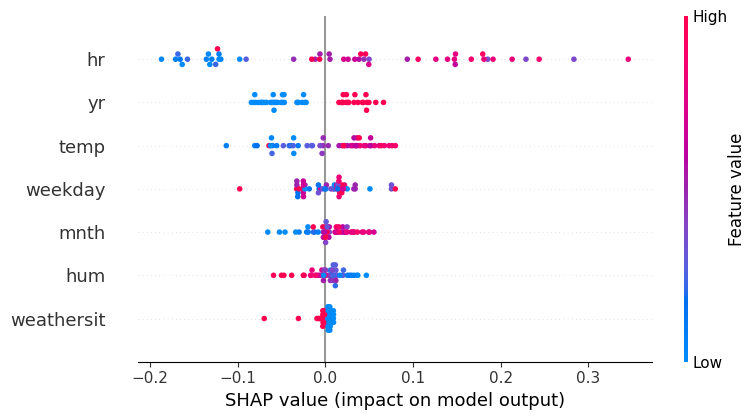

In [20]:
exp.model_explain(model='GAMI-Net', show='global_shap_summary', 
                  sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

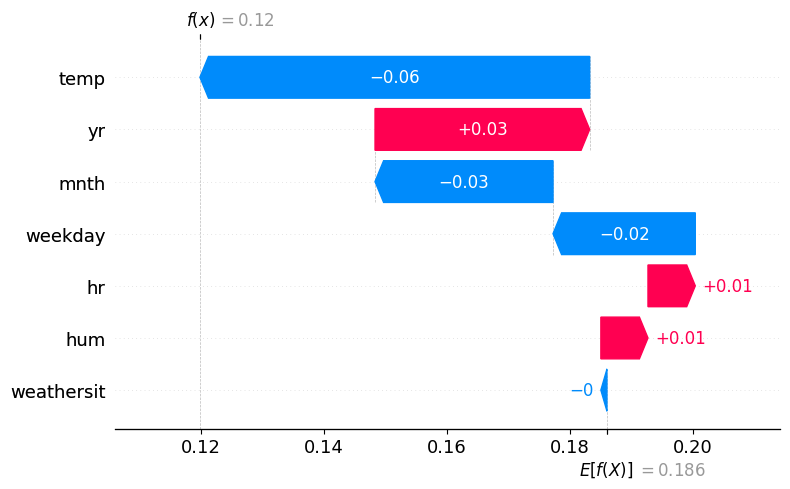

In [28]:
exp.model_explain(model='GAMI-Net', show='local_shap', sample_id=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

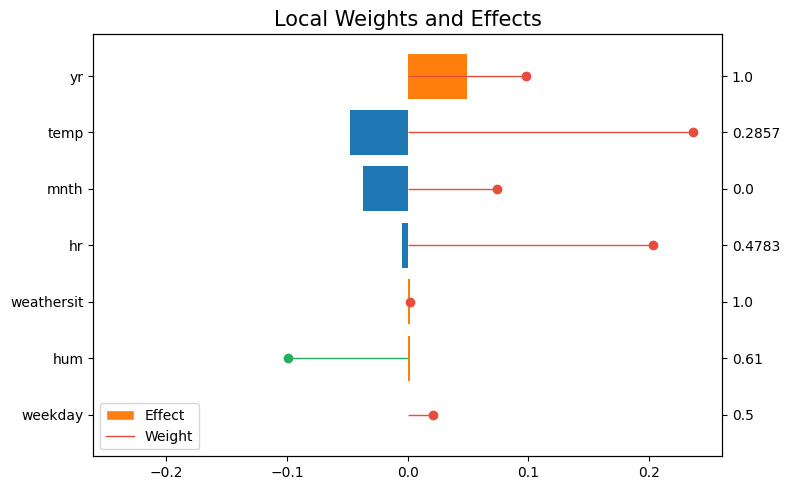

In [22]:
exp.model_explain(model='GAMI-Net', show='local_lime', sample_id=0)

## Inherent Interpretability: Global and Local Methods
 


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

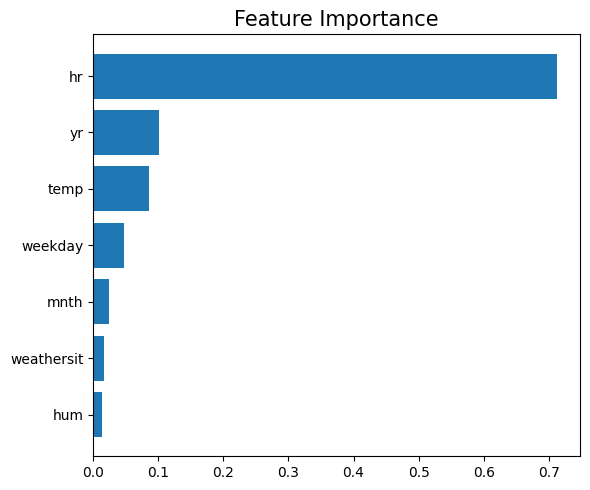

In [23]:
exp.model_interpret(model='GAMI-Net', show='global_fi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

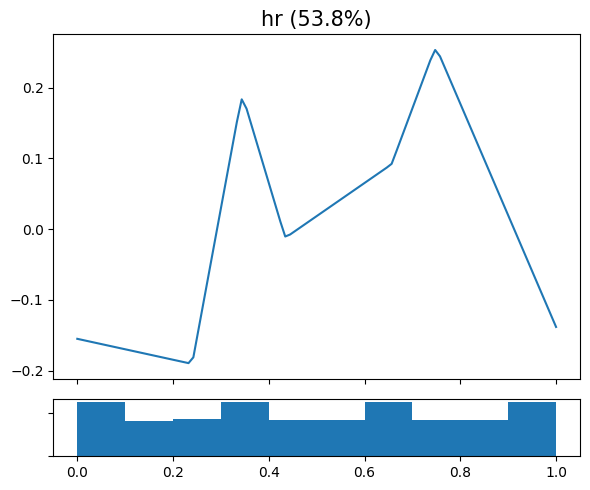

In [24]:
exp.model_interpret(model='GAMI-Net', show='global_effect_plot', uni_feature='hr', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

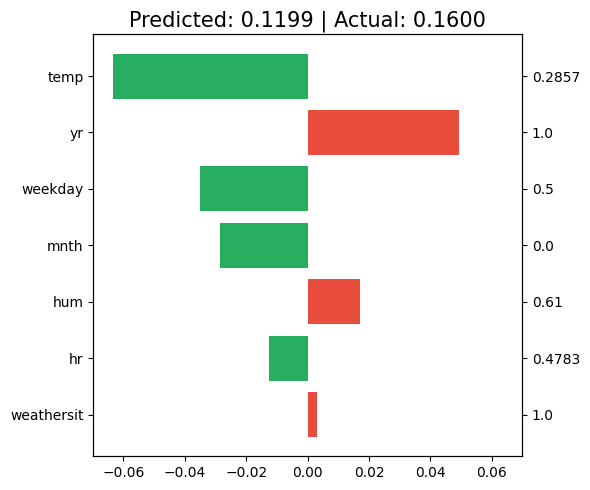

In [25]:
exp.model_interpret(model='GAMI-Net', show='local_fi', sample_id=0, figsize=(6,5))

# Model Diagnostics and Outcome Testing

In [29]:
exp.model_diagnose(model='GAMI-Net', show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,MSE,MAE,R2
,,,
Train,0.0034,0.0392,0.9012
Test,0.0037,0.0417,0.8940
Gap,0.0003,0.0025,-0.0072


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

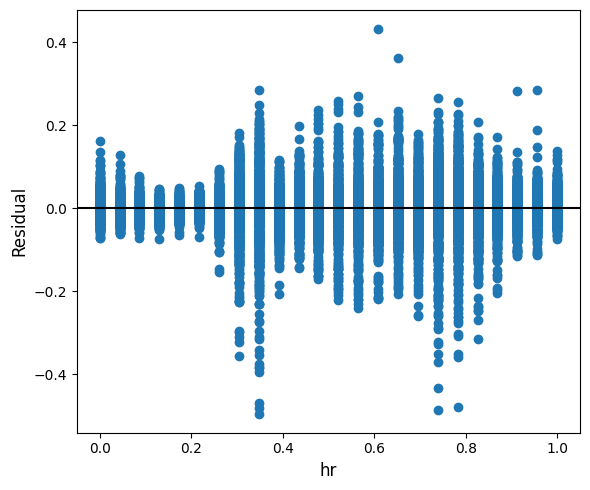

In [30]:
exp.model_diagnose(model='GAMI-Net', show='accuracy_residual', target_feature='hr', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

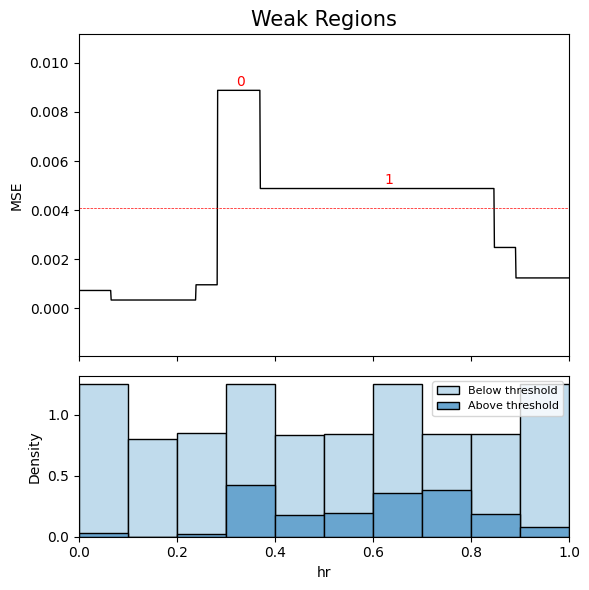

In [31]:
exp.model_diagnose(model='GAMI-Net', show='weakspot_plot', slice_features=['hr'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

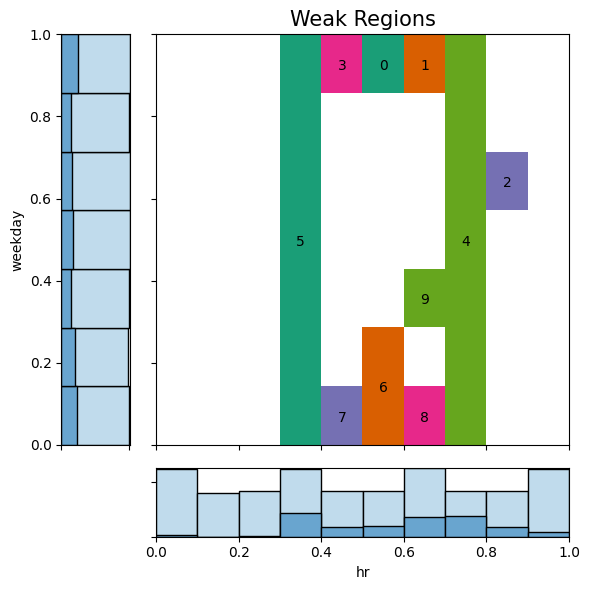

In [32]:
exp.model_diagnose(model='GAMI-Net', show='weakspot_plot', slice_features=['hr', 'weekday'], 
                   slice_method='histogram', threshold=1.2, min_sample=20, figsize=(6, 6))

In [39]:
exp.model_diagnose(model='GAMI-Net', show='weakspot_result', slice_features=['hr', 'weekday'], 
                   slice_method='histogram', threshold=1.2, min_sample=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Weak Regions cut-off at MSE: 0.00409


,[hr,hr),[weekday,weekday),#Test,#Train,test_MSE,train_MSE,Gap
0,0.5,0.6,0.8571,1.0000,35,175,0.0171,0.0101,0.0071
1,0.6,0.7,0.8571,1.0000,66,249,0.0092,0.0077,0.0016
2,0.8,0.9,0.5714,0.7143,33,175,0.0052,0.0041,0.0011
3,0.4,0.5,0.8571,1.0000,45,165,0.0066,0.0056,0.0010
4,0.7,0.8,0.0000,1.0000,290,1168,0.0095,0.0093,0.0002
5,0.3,0.4,0.0000,1.0000,445,1736,0.0069,0.0067,0.0002
6,0.5,0.6,0.0000,0.2857,88,330,0.0064,0.0064,0.0001
7,0.4,0.5,0.0000,0.1429,39,171,0.0041,0.0048,-0.0007
8,0.6,0.7,0.0000,0.1429,73,242,0.0055,0.0064,-0.0009
9,0.6,0.7,0.2857,0.4286,62,250,0.0029,0.0044,-0.0015


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

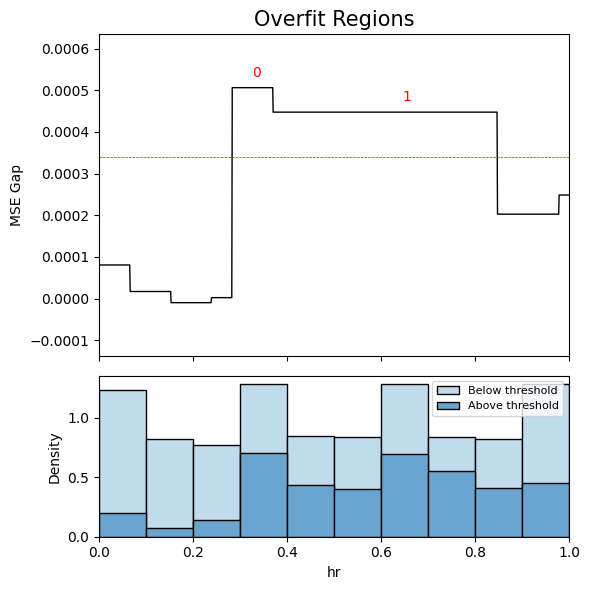

In [41]:
exp.model_diagnose(model='GAMI-Net', show='overfit_plot', slice_features=['hr'], 
                   slice_method='tree', threshold=1.1, min_sample=20, figsize=(6, 6))

In [36]:
exp.model_diagnose(model='GAMI-Net', show='reliability', alpha=0.9, 
                   target_feature='hr', threshold=1.2, bins=10)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [46]:
exp.model_diagnose(model='GAMI-Net', show='robustness', perturb_features='All Features',
                   perturb_size=0.01, alpha=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [47]:
exp.model_diagnose(model='GAMI-Net', show='resilience', immu_feature='None', 
                   target_feature='hr', alpha=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Box(children=(HBox(children=(Box(children=(VBox(children=(Output(), Output())),), layout=Layout(width='36%')),…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

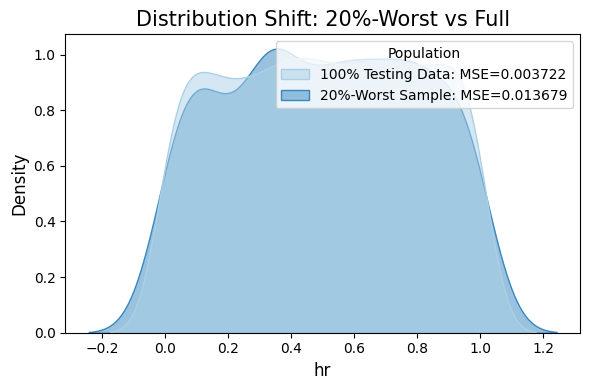

In [50]:
exp.model_diagnose(model='GAMI-Net', show='resilience_shift_density', immu_feature='hr', 
                   target_feature='hr', alpha=0.2, figsize=(6,4))

# Model Comparison and Benchmarking

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

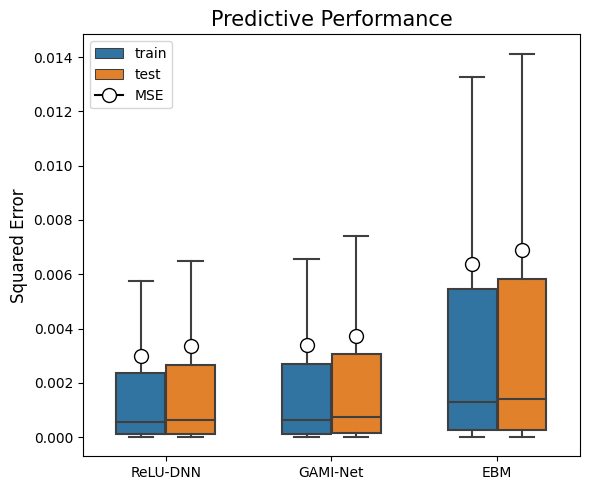

In [51]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_mse', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

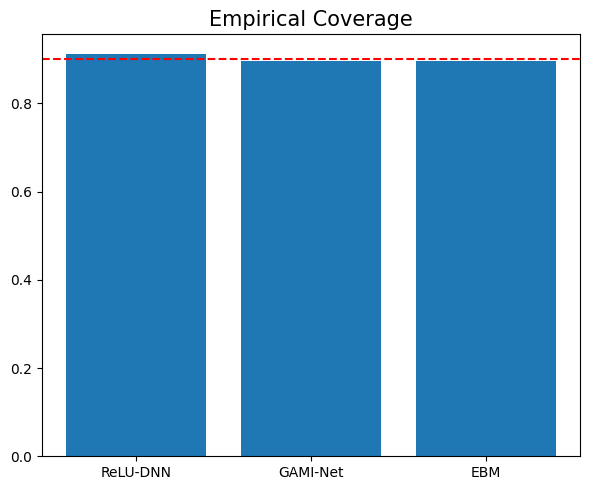

In [52]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='reliability_coverage', 
                  alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

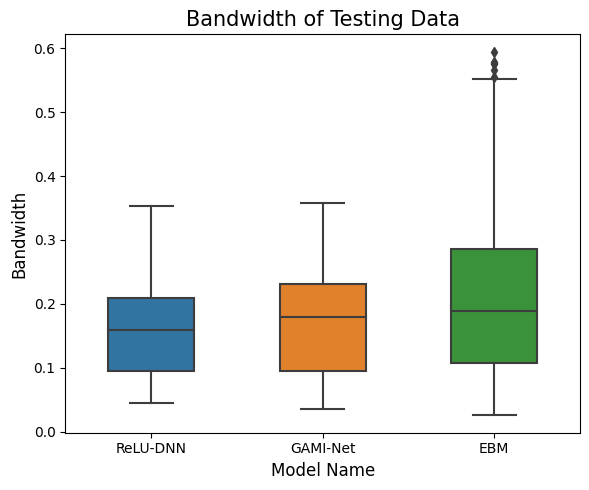

In [53]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='reliability_bandwidth', 
                  alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

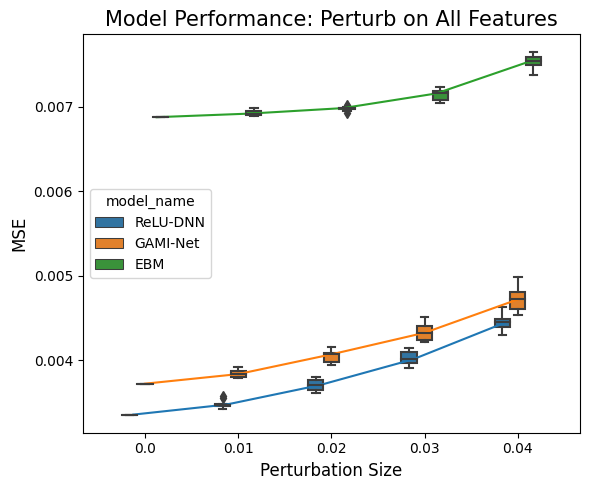

In [55]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', 
                  perturb_features='All Features', perturb_size=0.01, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

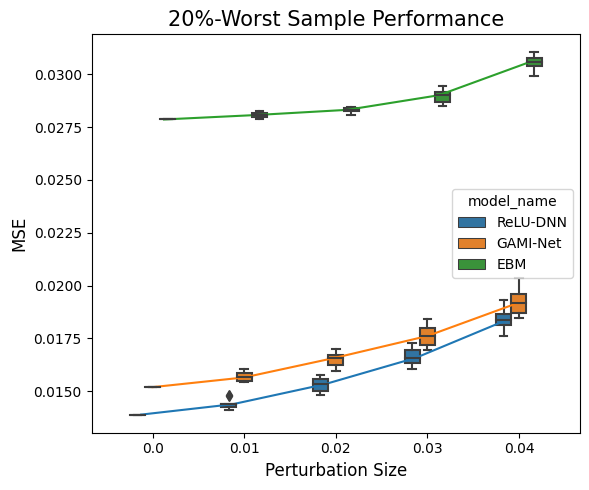

In [57]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  perturb_features='All Features', perturb_size=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

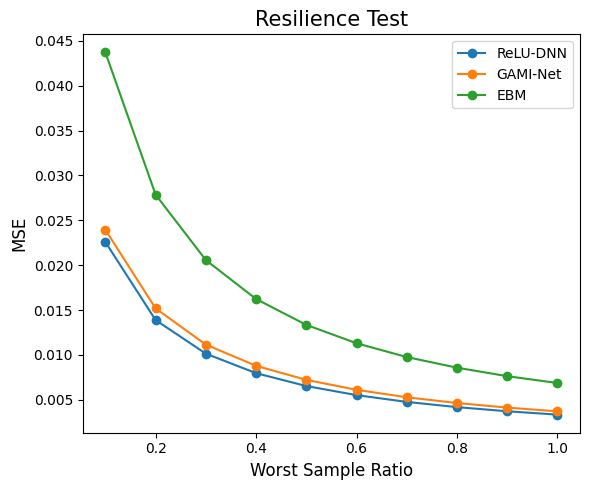

In [58]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', 
                  immu_feature='None', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

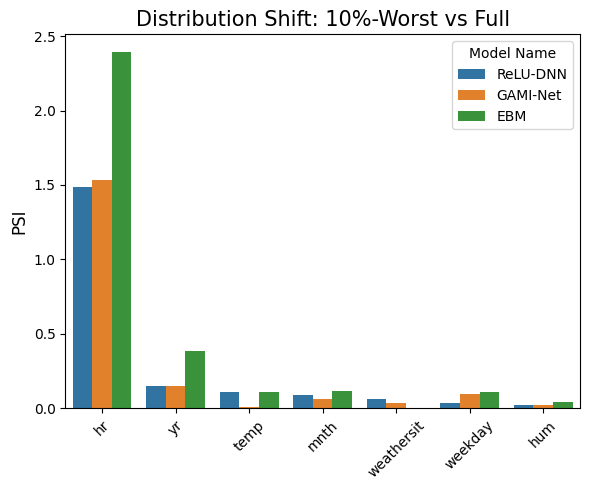

In [59]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_psi', 
                  immu_feature='None', figsize=(6,5))